In [37]:
import pandas as pd #Importando a biblioteca pandas
import numpy as np #Importando a biblioteca numpy
import matplotlib.pyplot as plt #Importando a biblioteca matplotlib

In [38]:
#Lendo arquivos
df = pd.read_excel('vendas_mundo.xlsx') #Lendo xlsx
#df = pd.read_csv('dados.csv', delimiter=';') #Caso fosse csv, o "delimiter=';'" informa o delimitador dos campos

In [39]:
#Visualização de arquivos
df.head() #Com valor default, mostra 5 primeiras linhas
#df.tail() #Mostar 5 últimas linhas
#df.loc[0:5] #Mostra por intervalo

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Regiao,Pais,Product ID,Categoria,SubCategoria,Total_Vendas,Quantidade,Desconto,Lucro,Prioridade
0,CA-2012-124891,31-07-2012,RH-19495,Consumidor,New York,United States,TEC-AC-10003033,Tecnologia,Accessories,2309.650,7,0.0,762.1845,Critico
1,IN-2013-77878,05-02-2013,JR-16210,Corporativo,New South Wales,Australia,FUR-CH-10003950,Moveis,Chairs,3709.395,9,0.1,-288.7650,Critico
2,IN-2013-71249,17-10-2013,CR-12730,Consumidor,Queensland,Australia,TEC-PH-10004664,Tecnologia,Phones,5175.171,9,0.1,919.9710,Medio
3,ES-2013-1579342,28-01-2013,KM-16375,Home Office,Berlin,Germany,TEC-PH-10004583,Tecnologia,Phones,2892.510,5,0.1,-96.5400,Medio
4,SG-2013-4320,05-11-2013,RH-9495,Consumidor,Dakar,Senegal,TEC-SHA-10000501,Tecnologia,Copiers,2832.960,8,0.0,311.5200,Critico


In [41]:
df.describe() #Resumo estatístico dos dados em um DataFrame 
#estatísticas descritivas, como a contagem de observações (linhas), a média, o desvio padrão, 
#os valores mínimo e máximo e os percentis 25, 50 e 75.

,Total_Vendas,Quantidade,Desconto,Lucro
count,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982
std,487.565361,2.278766,0.212280,174.340972
min,0.444000,1.000000,0.000000,-6599.978000
25%,30.758625,2.000000,0.000000,0.000000
50%,85.053000,3.000000,0.000000,9.240000
75%,251.053200,5.000000,0.200000,36.810000
max,22638.480000,14.000000,0.850000,8399.976000


In [42]:
#Forma de mudar o nome das colunas

#headers = ["ID_Pedido", "Data_Pedido", "ID_Cliente", "Segmento", "Regiao", "Pais", "Product ID", "Categoria", "SubCategoria", "Total_Vendas", "Quantidade", "Desconto", "Lucro", "Prioridade"]
#df.columns = headers # TROCANDO NOME DAS COLUNAS

#df.rename(columns={'Total_Vendas': 'Vendas_Total', 'Data_Pedido': 'Data'}, inplace=True)


In [43]:
#Selecionando colunas específicas
#df_selecionado = df[['ID_Pedido', 'Data', 'Vendas_Total']]

In [44]:
df_segmento = df.groupby('Segmento').count()


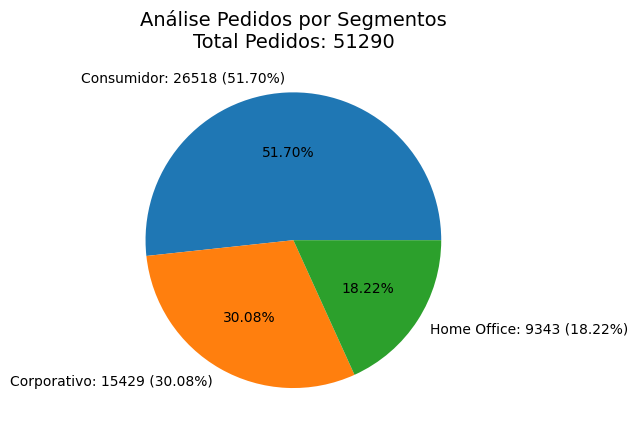

In [45]:
#Agrupa os dados do dataframe por Segmento e conta o número de pedidos em cada grupo
df_segmento = df.groupby('Segmento').size().reset_index(name='Total_Pedidos')

#Calcula o total de pedidos em toda a tabela
total_pedidos = df_segmento['Total_Pedidos'].sum()

#Adiciona uma coluna ao dataframe com a porcentagem de pedidos em cada segmento
df_segmento['Porcentagem'] = 100 * df_segmento['Total_Pedidos'] / total_pedidos

# Adiciona uma coluna ao dataframe com a label formatada para exibição no gráfico
df_segmento['Label'] = df_segmento.apply(lambda row: f"{row['Segmento']}: {row['Total_Pedidos']} ({row['Porcentagem']:.2f}%)", axis=1)

#Cria uma figura com um objeto de gráfico de pizza
fig, ax = plt.subplots()
#Plota o gráfico de pizza com os valores do Total_Pedidos e as labels do Label, exibindo as porcentagens com duas casas decimais
ax.pie(df_segmento['Total_Pedidos'], labels=df_segmento['Label'], autopct='%.2f%%')
#Remove o label do eixo y
ax.set_ylabel('')
#Define o título do gráfico com a contagem total de pedidos
ax.set_title("Análise Pedidos por Segmentos\nTotal Pedidos: {}".format(total_pedidos), fontsize=14)

#Exibe o gráfico
plt.show()



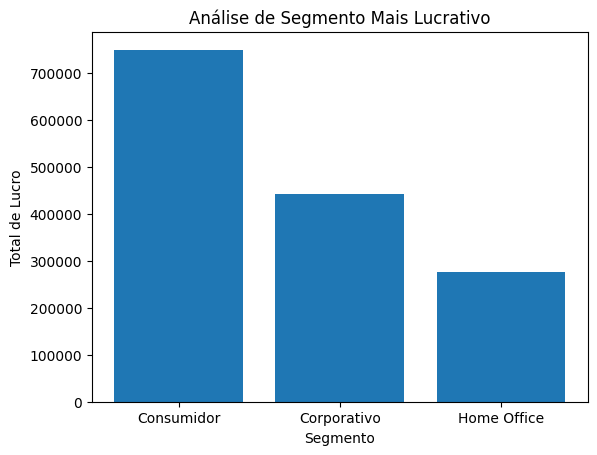

In [46]:
#Agrupa os dados por segmento e calcula a soma do lucro
df_lucro = df.groupby('Segmento')['Lucro'].sum().reset_index(name='Total_Lucro')

#Ordena os segmentos pelo total de lucro em ordem decrescente
df_lucro = df_lucro.sort_values('Total_Lucro', ascending=False)

#Calcula o total de lucro de todos os segmentos
total_lucro = df_lucro['Total_Lucro'].sum()

#Calcula a porcentagem do lucro de cada segmento em relação ao total de lucro
df_lucro['Porcentagem_Lucro'] = 100 * df_lucro['Total_Lucro'] / total_lucro

#Cria um gráfico de barras com os totais de lucro de cada segmento
plt.bar(df_lucro['Segmento'], df_lucro['Total_Lucro'])

#Define o rótulo do eixo x como 'Segmento'
plt.xlabel('Segmento')

#Define o rótulo do eixo y como 'Total de Lucro'
plt.ylabel('Total de Lucro')

#Define o título do gráfico como 'Análise de Segmento Mais Lucrativo'
plt.title('Análise de Segmento Mais Lucrativo')

#Exibe o gráfico
plt.show()



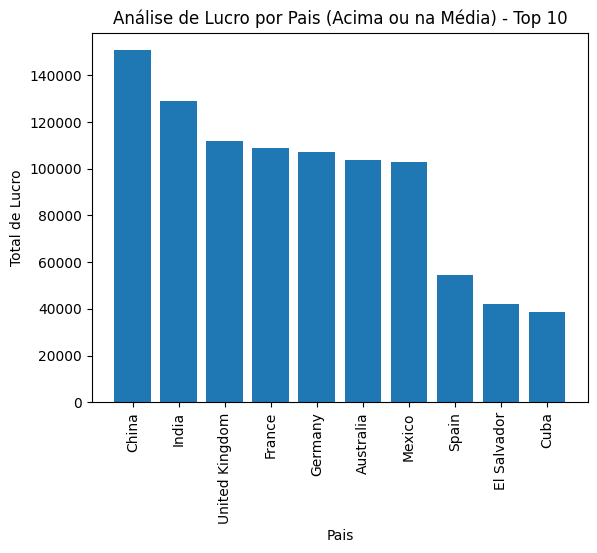

In [55]:
#calcula a média dos lucros por país
media_lucro_pais = df.groupby('Pais')['Lucro'].mean()

#filtra apenas os países que têm um lucro maior ou igual à média
df_filtrado = df[df['Pais'].isin(media_lucro_pais[media_lucro_pais >= media_lucro_pais.mean()].index)]

#plota o gráfico de barras com os 10 países com maiores lucros
df_lucro_pais = df_filtrado.groupby('Pais')['Lucro'].sum().reset_index(name='Total_Lucro')
df_lucro_pais = df_lucro_pais.sort_values('Total_Lucro', ascending=False).head(10)
total_lucro_pais = df_lucro_pais['Total_Lucro'].sum()
df_lucro_pais['Porcentagem_Lucro'] = 100 * df_lucro_pais['Total_Lucro'] / total_lucro_pais
plt.bar(df_lucro_pais['Pais'], df_lucro_pais['Total_Lucro'])
plt.xlabel('Pais')
plt.ylabel('Total de Lucro')
plt.title('Análise de Lucro por Pais (Acima ou na Média) - Top 10')
plt.xticks(rotation=90)
plt.show()

